In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate as itg
from scipy import special as spf
def PolyCoefficients(x, coeffs):
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y
class spline:
    def __init__(self,file):
        self.data = pd.read_csv(file,delimiter='\t',header=None).values  
        self.dim=2;
        self.l = (self.data.shape[0]+1)/(self.dim+1)
    def cx(self,k):
        return self.data[0+k];
    def cy(self,k):
        return self.data[self.l+k];

In [2]:
sp0= spline("spline0.txt")    
sp1= spline("spline1.txt")    

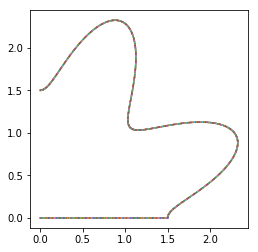

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
t = np.linspace(0.00, 1, 10)      

sp = sp0;
for k in range(0,sp.l-1,1):                      
    ax.plot(PolyCoefficients(t,sp.cx(k)),PolyCoefficients(t,sp.cy(k)))      
sp = sp1;
for k in range(0,sp.l-1,1):    
    ax.plot(PolyCoefficients(t,sp.cx(k)),PolyCoefficients(t,sp.cy(k)))      

ax.set_aspect('equal','box')
plt.show()

In [ ]:
idElement = 8

def r(t):    
    c=ar[idElement]
    return c[0]+c[1]*t+c[2]*t**2+c[3]*t**3+c[4]*t**4+c[5]*t**5
def dr(t):    
    c=ar[idElement]
    return c[1]+2*c[2]*t+3*c[3]*t**2+4*c[4]*t**3+5*c[5]*t**4
def z(t):    
    c=ar[idElement+l]
    return c[0]+c[1]*t+c[2]*t**2+c[3]*t**3+c[4]*t**4+c[5]*t**5
def dz(t):    
    c=ar[idElement+l]
    return c[1]+2*c[2]*t+3*c[3]*t**2+4*c[4]*t**3+5*c[5]*t**4
def J(t):
    return np.sqrt(dr(t)**2+dz(t)**2)

arc = itg.quad(J,0, 1.0,epsabs=1e-15)[0]
def xi(t):
    tmp = itg.quad(J, 0, t)[0]
    return tmp/arc
def N10(t):
    return 1- xi(t) 
def N11(t):
    return xi(t) 
def N20(t):
    return 1. - 3. * xi(t) + 2. * xi(t) * xi(t)
def N21(t):
    return 4. * xi(t) - 4. * xi(t) * xi(t)
def N22(t):
    return 2. * xi(t) * xi(t) - xi(t)

In [ ]:
rp = 0
zp = 4

def a(t): return rp*rp + r(t)*r(t) + (z(t)-zp)*(z(t)-zp)
def b(t): return r(t)*rp*2
def m(t): return 2*b(t)/(a(t)+b(t))
def regularSingle(t):  return r(t)*J(t)/np.sqrt(a(t)+b(t))/np.pi*spf.ellipk(m(t))  
def regularDouble(t):
    return 1.0/np.sqrt(a(t)+b(t))/np.pi*(
           ((dr(t)*(zp-z(t))-dz(t)*(rp-r(t)))/((zp-z(t))**2+(rp-r(t))**2)*r(t)-dz(t)/2)*spf.ellipe(m(t))  
           +dz(t)*spf.ellipk(m(t)) /2)
def regularSingle10(t): return regularSingle(t)*N10(t)
def regularSingle11(t): return regularSingle(t)*N11(t)
def regularSingle20(t): return regularSingle(t)*N20(t)
def regularSingle21(t): return regularSingle(t)*N21(t)
def regularSingle22(t): return regularSingle(t)*N22(t)
def regularDouble10(t): return regularDouble(t)*N10(t)
def regularDouble11(t): return regularDouble(t)*N11(t)
def regularDouble20(t): return regularDouble(t)*N20(t)
def regularDouble21(t): return regularDouble(t)*N21(t)
def regularDouble22(t): return regularDouble(t)*N22(t)

fmt='{:12.12f}'
result = [
    itg.quad(regularSingle10, 0,1)[0],    itg.quad(regularSingle11, 0,1)[0],
    itg.quad(regularDouble10, 0,1)[0],    itg.quad(regularDouble11, 0,1)[0],
    itg.quad(regularSingle20, 0,1)[0],    itg.quad(regularSingle21, 0,1)[0],
    itg.quad(regularSingle22, 0,1)[0],    itg.quad(regularDouble20, 0,1)[0],
    itg.quad(regularDouble21, 0,1)[0],    itg.quad(regularDouble22, 0,1)[0]      ]

print "===== N1 ====="
for i in np.arange(0,4):
    print('{:>15}'.format(fmt.format(result[i])))
print "===== N2 ====="
for i in np.arange(4,10):
    print('{:>15}'.format(fmt.format(result[i])))

In [ ]:
rp = 3
zp = 4

def a(t): return rp*rp + r(t)*r(t) + (z(t)-zp)*(z(t)-zp)
def b(t): return r(t)*rp*2
def m(t): return 2*b(t)/(a(t)+b(t))
def regularSingle(t):  return r(t)*J(t)/np.sqrt(a(t)+b(t))/np.pi*spf.ellipk(m(t))  
def regularDouble(t):
    return 1.0/np.sqrt(a(t)+b(t))/np.pi*(
           ((dr(t)*(zp-z(t))-dz(t)*(rp-r(t)))/((zp-z(t))**2+(rp-r(t))**2)*r(t)-dz(t)/2)*spf.ellipe(m(t))  
           +dz(t)*spf.ellipk(m(t)) /2)
def regularSingle10(t): return regularSingle(t)*N10(t)
def regularSingle11(t): return regularSingle(t)*N11(t)
def regularSingle20(t): return regularSingle(t)*N20(t)
def regularSingle21(t): return regularSingle(t)*N21(t)
def regularSingle22(t): return regularSingle(t)*N22(t)
def regularDouble10(t): return regularDouble(t)*N10(t)
def regularDouble11(t): return regularDouble(t)*N11(t)
def regularDouble20(t): return regularDouble(t)*N20(t)
def regularDouble21(t): return regularDouble(t)*N21(t)
def regularDouble22(t): return regularDouble(t)*N22(t)

fmt='{:12.12f}'
result = [
    itg.quad(regularSingle10, 0,1)[0],    itg.quad(regularSingle11, 0,1)[0],
    itg.quad(regularDouble10, 0,1)[0],    itg.quad(regularDouble11, 0,1)[0],
    itg.quad(regularSingle20, 0,1)[0],    itg.quad(regularSingle21, 0,1)[0],
    itg.quad(regularSingle22, 0,1)[0],    itg.quad(regularDouble20, 0,1)[0],
    itg.quad(regularDouble21, 0,1)[0],    itg.quad(regularDouble22, 0,1)[0]      ]

print "===== N1 ====="
for i in np.arange(0,4):
    print('{:>15}'.format(fmt.format(result[i])))
print "===== N2 ====="
for i in np.arange(4,10):
    print('{:>15}'.format(fmt.format(result[i])))

In [ ]:
rp = r(0)
zp = z(0)

def a(t): return rp*rp + r(t)*r(t) + (z(t)-zp)*(z(t)-zp)
def b(t): return r(t)*rp*2
def m(t): return 2*b(t)/(a(t)+b(t))
def regularSingle(t):  return r(t)*J(t)/np.sqrt(a(t)+b(t))/np.pi*spf.ellipk(m(t))  
def regularDouble(t):
    return 1.0/np.sqrt(a(t)+b(t))/np.pi*(
           ((dr(t)*(zp-z(t))-dz(t)*(rp-r(t)))/((zp-z(t))**2+(rp-r(t))**2)*r(t)-dz(t)/2)*spf.ellipe(m(t))  
           +dz(t)*spf.ellipk(m(t)) /2)
def regularSingle10(t): return regularSingle(t)*N10(t)
def regularSingle11(t): return regularSingle(t)*N11(t)
def regularSingle20(t): return regularSingle(t)*N20(t)
def regularSingle21(t): return regularSingle(t)*N21(t)
def regularSingle22(t): return regularSingle(t)*N22(t)
def regularDouble10(t): return regularDouble(t)*N10(t)
def regularDouble11(t): return regularDouble(t)*N11(t)
def regularDouble20(t): return regularDouble(t)*N20(t)
def regularDouble21(t): return regularDouble(t)*N21(t)
def regularDouble22(t): return regularDouble(t)*N22(t)

fmt='{:12.12f}'
result = [
    itg.quad(regularSingle10, 0,1)[0],    itg.quad(regularSingle11, 0,1)[0],
    itg.quad(regularDouble10, 0,1)[0],    itg.quad(regularDouble11, 0,1)[0],
    itg.quad(regularSingle20, 0,1)[0],    itg.quad(regularSingle21, 0,1)[0],
    itg.quad(regularSingle22, 0,1)[0],    itg.quad(regularDouble20, 0,1)[0],
    itg.quad(regularDouble21, 0,1)[0],    itg.quad(regularDouble22, 0,1)[0]      ]

print "===== N1 ====="
for i in np.arange(0,4):
    print('{:>15}'.format(fmt.format(result[i])))
print "===== N2 ====="
for i in np.arange(4,10):
    print('{:>15}'.format(fmt.format(result[i])))

In [ ]:
rp = r(1)
zp = z(1)

def a(t): return rp*rp + r(t)*r(t) + (z(t)-zp)*(z(t)-zp)
def b(t): return r(t)*rp*2
def m(t): return 2*b(t)/(a(t)+b(t))
def regularSingle(t):  return r(t)*J(t)/np.sqrt(a(t)+b(t))/np.pi*spf.ellipk(m(t))  
def regularDouble(t):
    return 1.0/np.sqrt(a(t)+b(t))/np.pi*(
           ((dr(t)*(zp-z(t))-dz(t)*(rp-r(t)))/((zp-z(t))**2+(rp-r(t))**2)*r(t)-dz(t)/2)*spf.ellipe(m(t))  
           +dz(t)*spf.ellipk(m(t)) /2)
def regularSingle10(t): return regularSingle(t)*N10(t)
def regularSingle11(t): return regularSingle(t)*N11(t)
def regularSingle20(t): return regularSingle(t)*N20(t)
def regularSingle21(t): return regularSingle(t)*N21(t)
def regularSingle22(t): return regularSingle(t)*N22(t)
def regularDouble10(t): return regularDouble(t)*N10(t)
def regularDouble11(t): return regularDouble(t)*N11(t)
def regularDouble20(t): return regularDouble(t)*N20(t)
def regularDouble21(t): return regularDouble(t)*N21(t)
def regularDouble22(t): return regularDouble(t)*N22(t)

fmt='{:12.12f}'
result = [
    itg.quad(regularSingle10, 0,1)[0],    itg.quad(regularSingle11, 0,1)[0],
    itg.quad(regularDouble10, 0,1)[0],    itg.quad(regularDouble11, 0,1)[0],
    itg.quad(regularSingle20, 0,1)[0],    itg.quad(regularSingle21, 0,1)[0],
    itg.quad(regularSingle22, 0,1)[0],    itg.quad(regularDouble20, 0,1)[0],
    itg.quad(regularDouble21, 0,1)[0],    itg.quad(regularDouble22, 0,1)[0]      ]

print "===== N1 ====="
for i in np.arange(0,4):
    print('{:>15}'.format(fmt.format(result[i])))
print "===== N2 ====="
for i in np.arange(4,10):
    print('{:>15}'.format(fmt.format(result[i])))

In [ ]:
ts=0.5665270551552793
rp = r(ts)
zp = z(ts)

def a(t): return rp*rp + r(t)*r(t) + (z(t)-zp)*(z(t)-zp)
def b(t): return r(t)*rp*2
def m(t): return 2*b(t)/(a(t)+b(t))
def regularSingle(t):  return r(t)*J(t)/np.sqrt(a(t)+b(t))/np.pi*spf.ellipk(m(t))  
def regularDouble(t):
    return 1.0/np.sqrt(a(t)+b(t))/np.pi*(
           ((dr(t)*(zp-z(t))-dz(t)*(rp-r(t)))/((zp-z(t))**2+(rp-r(t))**2)*r(t)-dz(t)/2)*spf.ellipe(m(t))  
           +dz(t)*spf.ellipk(m(t)) /2)
def regularSingle10(t): return regularSingle(t)*N10(t)
def regularSingle11(t): return regularSingle(t)*N11(t)
def regularSingle20(t): return regularSingle(t)*N20(t)
def regularSingle21(t): return regularSingle(t)*N21(t)
def regularSingle22(t): return regularSingle(t)*N22(t)
def regularDouble10(t): return regularDouble(t)*N10(t)
def regularDouble11(t): return regularDouble(t)*N11(t)
def regularDouble20(t): return regularDouble(t)*N20(t)
def regularDouble21(t): return regularDouble(t)*N21(t)
def regularDouble22(t): return regularDouble(t)*N22(t)
fmt='{:12.12f}'
result = [
    itg.quad(regularSingle10, 0,1)[0],    itg.quad(regularSingle11, 0,1)[0],
    itg.quad(regularDouble10, 0,1)[0],    itg.quad(regularDouble11, 0,1)[0],
    itg.quad(regularSingle20, 0,1,points=[ts])[0],    itg.quad(regularSingle21, 0,1,points=[ts])[0],
    itg.quad(regularSingle22, 0,1,points=[ts])[0],    itg.quad(regularDouble20, 0,1,points=[ts])[0],
    itg.quad(regularDouble21, 0,1,points=[ts])[0],    itg.quad(regularDouble22, 0,1,points=[ts])[0]      ]

print "===== N1 ====="
for i in np.arange(0,4):
    print('{:>15}'.format(fmt.format(result[i])))
print "===== N2 ====="
for i in np.arange(4,10):
    print('{:>15}'.format(fmt.format(result[i])))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

for k in range(0,l-1,1):
    t = np.linspace(0.00, 1, 10)
    cx = ar[0+k]
    cy = ar[l+k]                    
    ax.plot(PolyCoefficients(t,cx),PolyCoefficients(t,cy))           

    
t0 = np.arange(0,1,0.25);
ax.scatter(r(t0),z(t0))
ax.set_aspect('equal','box')
plt.show()